In [266]:
import torch
import itertools
import random
import matplotlib.pyplot as plt
import numpy as np

In [282]:
def make_toy_data(num_examples, inpt_func, outpt_func):
    generator =  torch.rand(num_examples)
    inpt = inpt_func(generator)
    outpt = outpt_func(inpt)
    return inpt, outpt

def check_outpt(label, outpt, tol_neg, tol_pos):
    diff = label-outpt
    return torch.all(diff > tol_neg) and torch.all(diff < tol_pos)

def make_tol(std_dev, dim, seq_len, add=1e-3):
    tol_neg = - (torch.abs(torch.normal(mean=torch.zeros(dim), std=std_dev*torch.ones(dim))) + add).repeat(seq_len).reshape(seq_len, -1)
    tol_pos = + (torch.abs(torch.normal(mean=torch.zeros(dim), std=std_dev*torch.ones(dim))) + add).repeat(seq_len).reshape(seq_len, -1)
    return tol_neg, tol_pos

def make_func(dim_in,dim_out, seq_len):
    seq_add = torch.arange(0,1,1/seq_len)
    di_a = [[i for i in range(dim_in)] for j in range(dim_in)]
    index_ = list(itertools.product(*di_a))
    ri = random.choices(index_, k=dim_out)
    tri = torch.tensor(ri)
    signs = torch.randint(low=-1, high=2, size=(dim_in*dim_out,)).repeat(seq_len).reshape(-1)
    #print(signs)

    tri = tri.reshape(-1).repeat(seq_len).reshape(1,-1)
    seq_counter = torch.arange(0, seq_len).reshape(1,-1).repeat([dim_in*dim_out, 1]).T.reshape(1,-1)
    tri = torch.cat((seq_counter, tri), dim=0)

    def inner_fc(inpt):
        seq_inpt = inpt[None, :] + seq_add[:,None]
        result = seq_inpt[tuple(tri)]
        result = result * signs
        result[signs==0]=1
        result = result.reshape(seq_len, dim_out, dim_in)
        result = torch.prod(result, dim=2)
        return result
    return inner_fc

def plot_fcts(inpt, neg_tol, pos_tol):
    inpt_dim = len(inpt[0])
    neg_inpt = (inpt + neg_tol).numpy()
    pos_inpt = (inpt + pos_tol).numpy()
    seq_len = len(inpt)
    np_inpt = inpt.numpy()
    num_graphs = int(np.ceil(np.sqrt(inpt_dim)))
    print(num_graphs)
    fig, ax = plt.subplots(num_graphs,num_graphs)
    fig.set_size_inches(9, 9)
    for sp in range(inpt_dim):
        idx = sp // num_graphs
        idy = sp  % num_graphs
        ax[idx,idy].clear()
        ax[idx,idy].plot(range(seq_len), np_inpt[:,sp], alpha=0.5, color='midnightblue')
        ax[idx,idy].plot(range(seq_len), neg_inpt[:,sp], alpha=0.5, color='orangered')
        ax[idx,idy].plot(range(seq_len), pos_inpt[:,sp], alpha=0.5, color='orangered')

In [289]:
inner_fct = make_func(6, 3, 10)
neg, pos = make_tol(1, 3, 10)

2


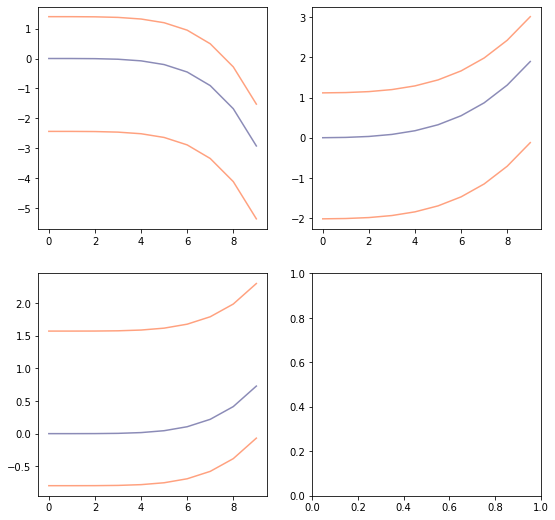

In [290]:
inpt = inner_fct(torch.tensor([0,0,1,0.1,0.1,0.1]))
plot_fcts(inpt=inpt, neg_tol=neg, pos_tol=pos)
#make_func(2,3,torch.tensor([1,2]))

In [48]:
print(inner_fct(torch.tensor([1,3])))

tensor([ 1, -3, -1])


In [122]:
a = torch.tensor([[1,2], [3,4]])

In [160]:
b = torch.tensor([[0,1], [0,1]])
b.shape

torch.Size([2, 2])

In [161]:
a[tuple(b)]

tensor([1, 4])